In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from scipy import io
import pykilosort as ks
from pykilosort import datashift

import matplotlib.pyplot as plt

In [2]:
# [dat, kkmax, st, cF] = spikedetector3(Params, dataRAW, wTEMP, iC-1, dist, v2, iC2-1, dist2);

matlab_input = io.loadmat("/home/alexmorley/git_repos/spikedetector3_input.mat")

Params = matlab_input["Params"]
dataRAW = matlab_input["dataRAW_"]
wTEMP = matlab_input["wTEMP_"]
iC = matlab_input["iC_"]
iC2 = matlab_input["iC2_"]
dist = matlab_input["dist_"]
dist2 = matlab_input["dist2_"]
v2 = matlab_input["v2_"]

iC = iC - 1
iC2 = iC2 - 1

In [3]:
matlab_output = io.loadmat("/home/alexmorley/git_repos/spikedetector3_output.mat")

expected_dat = matlab_output["dat_"]
expected_kkmax = matlab_output["kkmax_"]
expected_st = matlab_output["st_"]
expected_cF = matlab_output["cF_"]

In [4]:
# run the CUDA function on this batch
dat, kkmax, st, cF = datashift.standalonedetector.spikedetector3(
  Params[0], dataRAW, wTEMP, iC, dist, v2, iC2, dist2
)


In [5]:
assert dat.shape == expected_dat.shape
assert kkmax.shape == kkmax.shape
assert st.shape == st.shape
assert cF.shape == cF.shape


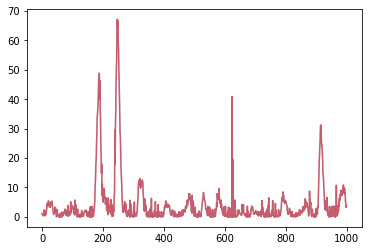

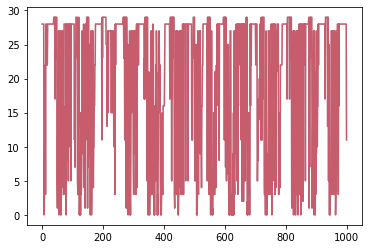

In [6]:
plt.plot(dat[:1000,0], alpha=0.5)
plt.plot(expected_dat[:1000,0], color="r", alpha=0.5)

plt.figure()
plt.plot(kkmax[:1000,0], alpha=0.5)
plt.plot(expected_kkmax[:1000,0], color="r", alpha=0.5)

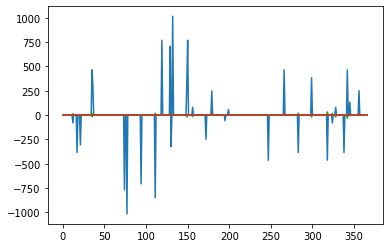

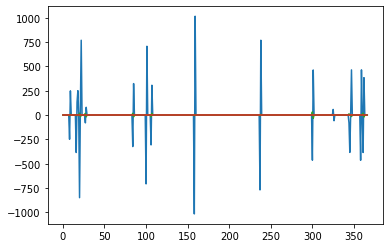

In [7]:
st2 = st[:,np.argsort(st[0,:])]
expected_st2 = expected_st[:,np.argsort(st[0,:])]

plt.plot(st2[0,:] - expected_st2[0,:])

plt.plot(st2[1,:] - expected_st2[1,:])

plt.plot(st2[2,:] - expected_st2[2,:])

plt.plot(st2[3,:] - expected_st2[3,:])

plt.figure()
plt.plot((st[0,:]) - expected_st[0,:])

plt.plot(st[1,:] - expected_st[1,:])

plt.plot(st[2,:] - expected_st[2,:])

plt.plot(st[3,:] - expected_st[3,:])